IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
import missingno as ms
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

INSERTING DATASET

In [ ]:
data=pd.read_csv("/content/Titanic-Dataset.csv")
test_df=pd.read_csv('/content/Titanic-Dataset.csv')
#reading the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#getting shape of the dataset
data.shape

(891, 12)

In [ ]:
#getting information about datset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#description of dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#duplication check
print("Number of duplication is", data.duplicated().sum(),'.')

Number of duplication is 0 .


MISSING VALUES CHECK

In [ ]:
val=data.isnull().sum().sort_values(ascending=False)
val.head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [ ]:
#percentage of missing values
val_per = data.isnull().sum()/data.isnull().count()*100
null = pd.DataFrame({'missing values' : val , 'Percentage': val_per.sort_values(ascending=False)})
null.head()

,missing values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


MATRIX PLOT

Text(0.5, 1.0, 'Plot to see missing values')

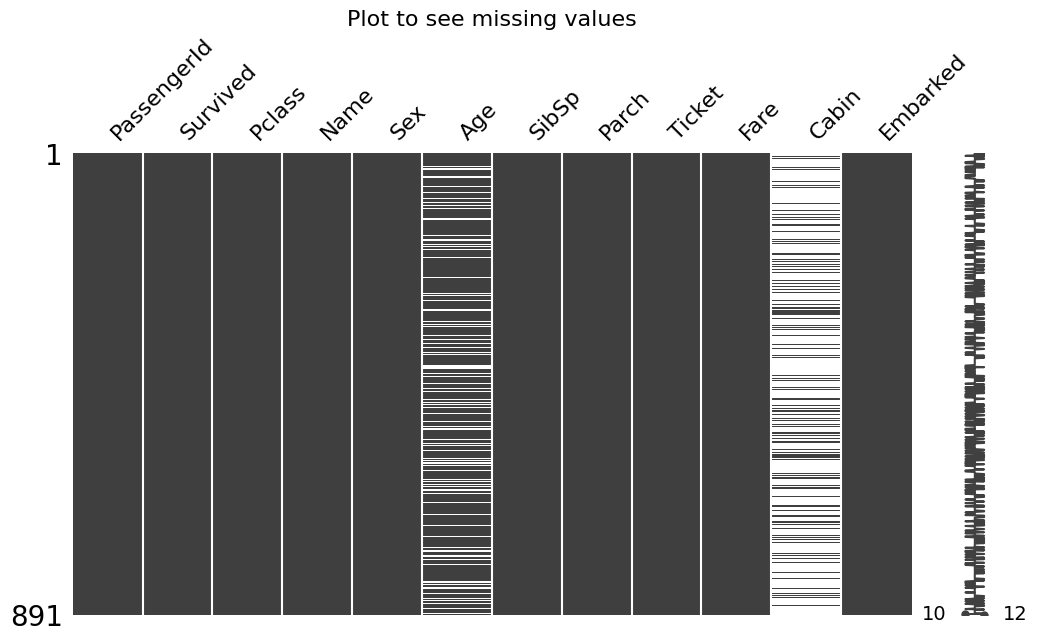

In [ ]:
ms.matrix(data , figsize=(12,6))
plt.title("Plot to see missing values",size=16)

BARPLOT

Text(0.5, 1.0, 'Barplot to see lacking of data values')

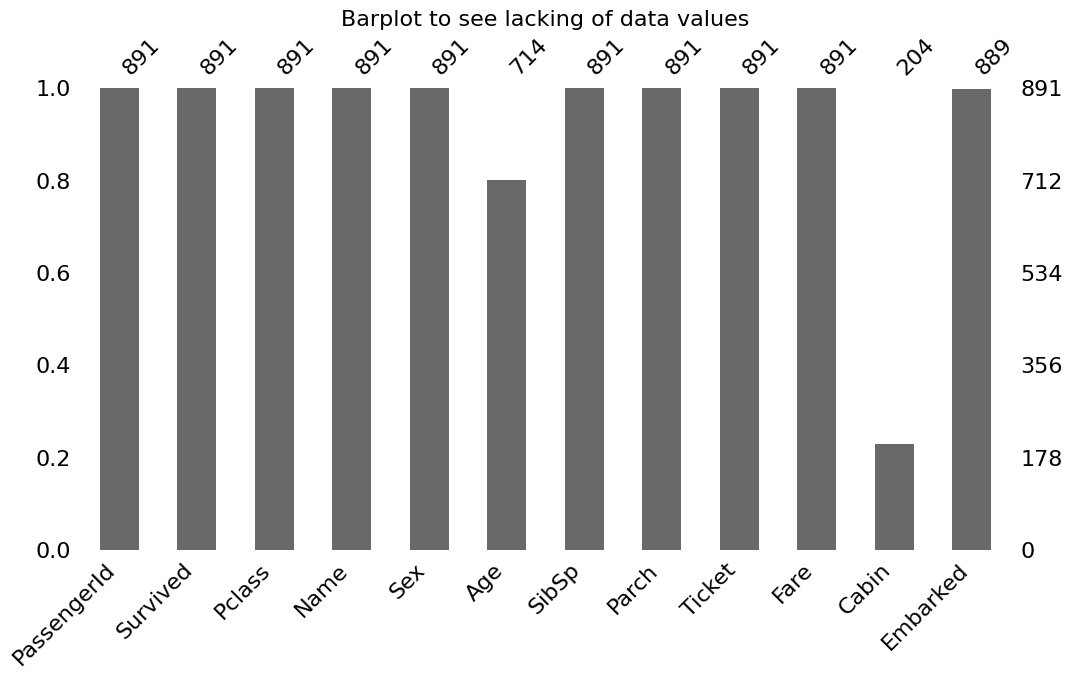

In [ ]:
ms.bar(data, figsize=(12,6))
plt.title("Barplot to see lacking of data values", size=16)

REPLACING MISSING VALUES

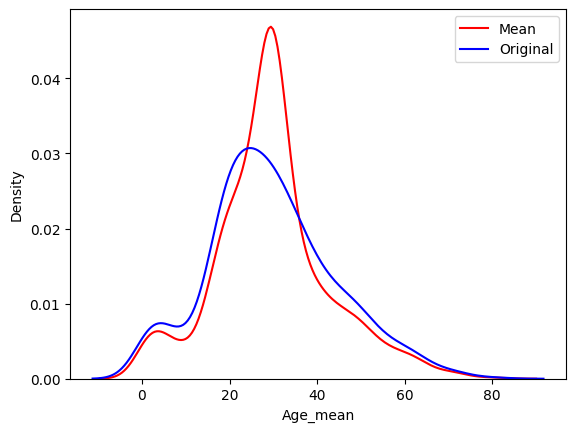

In [ ]:
data["Age_mean"] = data["Age"].fillna(data["Age"].mean())


sns.kdeplot(data['Age_mean'], color='red', label='Mean')
sns.kdeplot(data['Age'], color='blue', label='Original')
plt.legend()

DROPING DATASET

In [ ]:
data.drop(['Age_mean'],axis=1, inplace=True)

data["Age"] = data["Age"].fillna(data["Age"].mean())

In [ ]:
data.drop(['Cabin', 'Name', 'Ticket', 'Fare', 'PassengerId'],axis=1, inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


VISUAL ANALYSIS

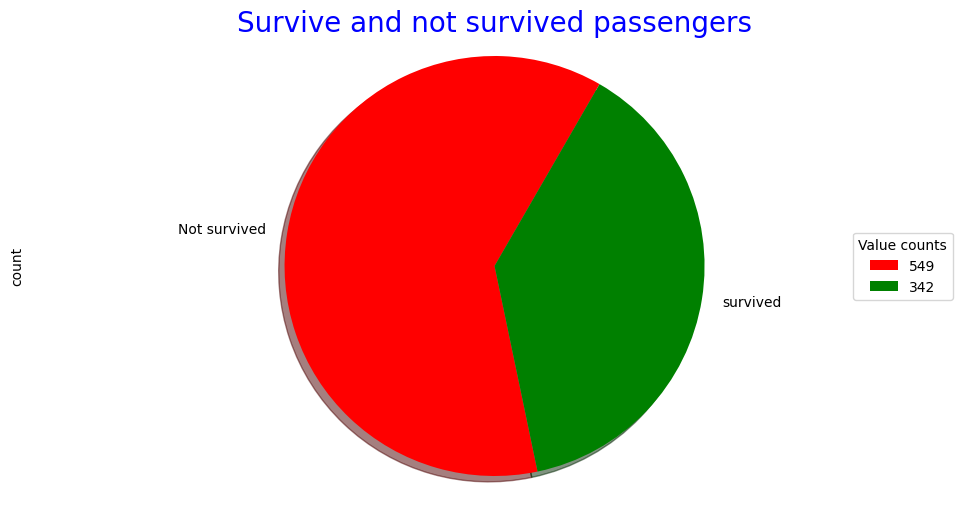

In [ ]:
data["Survived"].value_counts().plot(kind='pie', figsize=(12,6), shadow=True, startangle=60, labels=["Not survived" , "survived"],
                                     colors=["red" , "green"])
plt.title("Survive and not survived passengers", c="b", size=20, y=0.99)
plt.axis("equal")
plt.legend(title="Value counts", labels=data["Survived"].value_counts(), loc="center right")

BARPLOT VISUALIZATION

In [ ]:
def bar_graph(features):
  feature = data[features];
  feature_val = feature.value_counts();

  plt.figure(figsize=(10,6));
  plt.bar(feature_val.index, feature_val , color="blue");
  plt.title(features);
  plt.xticks(feature_val.index , feature_val.index.values);
  plt.ylabel("count")

  plt.show();
  print("{ \n{}".format(features , feature_val));

  cols = ["Pclass" , "Sex" , "Embarked" , "Parch" , "SibSp"]
  for i in cols:
    bar_graph(i)

CROSS TABLE

In [ ]:
pd.crosstab(data["Survived"] , data["Pclass"], margins=True , margins_name="Total")

Pclass,1,2,3,Total
Survived,,,,
0,80,97,372,549
1,136,87,119,342
Total,216,184,491,891


In [ ]:
pd.crosstab(data["Survived"] , data["Sex"], margins=True , margins_name="Total")

Sex,female,male,Total
Survived,,,
0,81,468,549
1,233,109,342
Total,314,577,891


In [ ]:
pd.crosstab(data["Survived"] , data["SibSp"], margins=True , margins_name="total")

SibSp,0,1,2,3,4,5,8,total
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
total,608,209,28,16,18,5,7,891


PIVOT TABLE

In [ ]:
pivot = data.pivot_table("Survived", index=['Embarked' , 'Pclass' , 'SibSp'], columns="Sex")
pivot

Sex                      female      male
Embarked Pclass SibSp                    
C        1      0      0.956522  0.343750
                1      1.000000  0.600000
                2      1.000000       NaN
         2      0      1.000000  0.400000
                1      1.000000  0.000000
         3      0      0.692308  0.176471
                1      0.428571  0.500000
                2      1.000000  0.000000
Q        1      1      1.000000       NaN
                2           NaN  0.000000
         2      0      1.000000  0.000000
         3      0      0.703704  0.068966
                1      0.800000  0.000000
                2      1.000000  1.000000
                4           NaN  0.000000
S        1      0      1.000000  0.321429
                1      0.904762  0.428571
                2      1.000000  1.000000
                3      1.000000  0.000000
         2      0      0.925000  0.100000
                1      0.869565  0.318182
                2      1.000000  0.200000
                3      1.000000       NaN
         3      0      0.487805  0.130435
                1      0.384615  0.187500
                2      0.000000  0.000000
                3      0.125000  0.000000
                4      0.333333  0.125000
                5      0.000000  0.000000
                8      0.000000  0.000000

<Axes: xlabel='Embarked,Pclass,SibSp'>

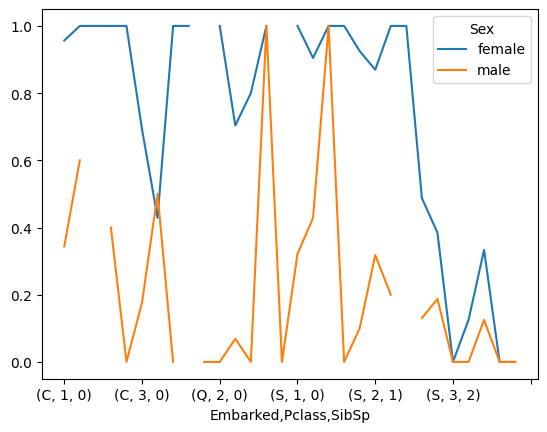

In [ ]:
pivot.plot()

TARGET VARIABLE

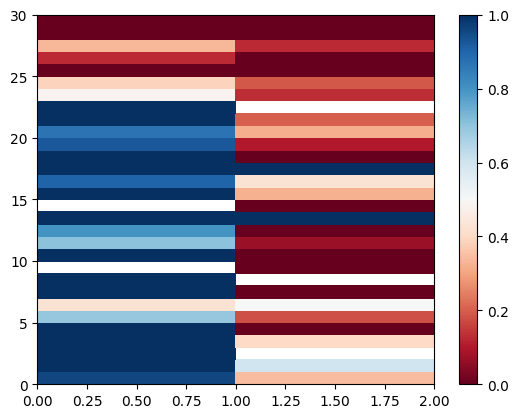

In [ ]:
plt.pcolor(pivot , cmap='RdBu')
plt.colorbar()
plt.show()

DATA PREPARATION

In [ ]:
data.replace({'Sex': {'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0.0
1,1,1,1,38.0,1,0,1.0
2,1,3,1,26.0,0,0,0.0
3,1,1,1,35.0,1,0,0.0
4,0,3,0,35.0,0,0,0.0


In [ ]:
X=data.drop(columns=['Survived'],axis=1)
Y=data['Survived']

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch  Embarked
0         3    0  22.000000      1      0       0.0
1         1    1  38.000000      1      0       1.0
2         3    1  26.000000      0      0       0.0
3         1    1  35.000000      1      0       0.0
4         3    0  35.000000      0      0       0.0
..      ...  ...        ...    ...    ...       ...
886       2    0  27.000000      0      0       0.0
887       1    1  19.000000      0      0       0.0
888       3    1  29.699118      1      2       0.0
889       1    0  26.000000      0      0       1.0
890       3    0  32.000000      0      0       2.0

[891 rows x 6 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


SPLITTING INTO TRAIN AND TEST

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(891, 6) (712, 6) (179, 6)


In [ ]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
X_train = data.iloc[: , 1:7]
Y_train = data.loc[: , 'Survived']

In [ ]:
sc_object = StandardScaler()
X_train = sc_object.fit_transform(X_train)

In [ ]:
from sklearn.impute import SimpleImputer
import sklearn.svm

SVC TEST

In [ ]:
import sklearn.svm
from sklearn.svm import SVC
imputer = SimpleImputer(strategy="mean")
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)
svc = SVC(random_state=0)
svc.fit(X_train_imputed, Y_train)
svc_score = round(svc.score(X_train_imputed, Y_train)*100, 2)
print("Accuracy of the SVC prediction: ", svc_score)

Accuracy of the SVC prediction:  84.4


PREDICTION

In [ ]:
final_prediction = np.array([0] * 891)

In [ ]:
output_df = pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived' : final_prediction})
output_df.head()

,PassengerId,Survived
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
